In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [3]:
df = pd.read_csv('enb_posneg.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df

,High Change,Low Change,High/Close,Low/Close,Spread,Spread Change,Volume Diff,Vol change,Return ewm,Oil return,SU return,TSX return,Gas return,Return,Chaikin,Chaikin Change,Pos
Date,,,,,,,,,,,,,,,,,
2010-01-06,0.008437,-0.016291,0.033755,-0.006329,0.583621,1.676060,1473200.0,1.207739,-0.011999,0.017244,0.013427,0.004744,0.065993,-0.022681,7.105000e+05,-14.611111,0
2010-01-07,-0.029387,-0.011889,0.006561,-0.015026,0.313312,-0.463158,-327400.0,-0.121574,-0.006109,-0.006251,-0.010956,-0.004772,-0.033783,-0.003164,1.915500e+05,-0.730401,1
2010-01-08,-0.001262,0.011817,0.003592,-0.005071,0.125939,-0.598040,-708800.0,-0.299628,-0.000908,0.001089,-0.003349,0.005577,-0.009817,0.001693,-2.586250e+05,-2.350170,0
2010-01-11,0.000631,-0.006159,0.011277,-0.004255,0.224233,0.780487,161600.0,0.097537,-0.004951,-0.002779,-0.002843,-0.000561,-0.051313,-0.006972,-4.851250e+04,-0.812421,0
2010-01-12,-0.007153,0.000428,0.004684,-0.003194,0.113652,-0.493152,-606000.0,-0.333260,-0.002076,-0.020965,-0.018403,-0.010622,0.025119,-0.000638,-3.272562e+05,5.745813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,0.023494,0.011546,0.001138,-0.023208,1.070000,0.945443,-4180500.0,-0.357959,0.018062,-0.005638,-0.017939,-0.002841,-0.009444,0.023045,-1.014769e+06,-1.471774,1
2021-01-14,0.024545,0.024458,0.001333,-0.023101,1.100002,0.028040,4354700.0,0.580766,0.022251,0.012474,0.042481,0.001305,-0.022369,0.024346,1.669966e+06,-2.645661,0
2021-01-15,0.003327,0.008186,0.007799,-0.012032,0.889999,-0.190911,2637700.0,0.222536,0.005344,-0.022587,-0.048085,-0.002734,0.026632,-0.003110,2.153833e+06,0.289747,1


In [4]:
df.columns

Index(['High Change', 'Low Change', 'High/Close', 'Low/Close', 'Spread',
       'Spread Change', 'Volume Diff', 'Vol change', 'Return ewm',
       'Oil return', 'SU return', 'TSX return', 'Gas return', 'Return',
       'Chaikin', 'Chaikin Change', 'Pos'],
      dtype='object')

In [5]:
df_input = df[['High Change', 'Low Change', 'High/Close', 'Low/Close', 'Spread',
       'Volume Diff', 'Vol change', 'Return ewm', 'Oil return', 'SU return',
       'TSX return', 'Gas return', 'Return', 'Chaikin']]
df_input

,High Change,Low Change,High/Close,Low/Close,Spread,Volume Diff,Vol change,Return ewm,Oil return,SU return,TSX return,Gas return,Return,Chaikin
Date,,,,,,,,,,,,,,
2010-01-06,0.008437,-0.016291,0.033755,-0.006329,0.583621,1473200.0,1.207739,-0.011999,0.017244,0.013427,0.004744,0.065993,-0.022681,7.105000e+05
2010-01-07,-0.029387,-0.011889,0.006561,-0.015026,0.313312,-327400.0,-0.121574,-0.006109,-0.006251,-0.010956,-0.004772,-0.033783,-0.003164,1.915500e+05
2010-01-08,-0.001262,0.011817,0.003592,-0.005071,0.125939,-708800.0,-0.299628,-0.000908,0.001089,-0.003349,0.005577,-0.009817,0.001693,-2.586250e+05
2010-01-11,0.000631,-0.006159,0.011277,-0.004255,0.224233,161600.0,0.097537,-0.004951,-0.002779,-0.002843,-0.000561,-0.051313,-0.006972,-4.851250e+04
2010-01-12,-0.007153,0.000428,0.004684,-0.003194,0.113652,-606000.0,-0.333260,-0.002076,-0.020965,-0.018403,-0.010622,0.025119,-0.000638,-3.272562e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,0.023494,0.011546,0.001138,-0.023208,1.070000,-4180500.0,-0.357959,0.018062,-0.005638,-0.017939,-0.002841,-0.009444,0.023045,-1.014769e+06
2021-01-14,0.024545,0.024458,0.001333,-0.023101,1.100002,4354700.0,0.580766,0.022251,0.012474,0.042481,0.001305,-0.022369,0.024346,1.669966e+06
2021-01-15,0.003327,0.008186,0.007799,-0.012032,0.889999,2637700.0,0.222536,0.005344,-0.022587,-0.048085,-0.002734,0.026632,-0.003110,2.153833e+06


In [6]:
y = df[["Pos"]]
y.head()

,Pos
Date,
2010-01-06,0
2010-01-07,1
2010-01-08,0
2010-01-11,0
2010-01-12,0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df_input, y, test_size=0.3, random_state=42)

In [8]:
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()


x_train_scaler.fit(x_train)
x_test_scaler.fit(x_test)


x_train = x_train_scaler.transform(x_train)
x_test = x_test_scaler.transform(x_test)

enc = OneHotEncoder()
enc.fit(y_train)

encoded_y_train = enc.transform(y_train).toarray()
encoded_y_test = enc.transform(y_test).toarray()
encoded_y_train[0]

array([0., 1.])

In [9]:
batch = 44
features = x_test.shape[1]

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout 

In [11]:
units = 64
drop = 0.2

nn = Sequential()

nn.add(Dense(units=units, input_dim=features, activation="relu"))

nn.add(Dense(2, activation="softmax"))

In [12]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 1,090
Trainable params: 1,090
Non-trainable params: 0
_________________________________________________________________


In [13]:
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
class ThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(ThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_loss = logs["val_accuracy"]
        if val_loss > self.threshold:
            self.model.stop_training = True

In [15]:
earlystop = ThresholdCallback(threshold=0.545)

model = nn.fit(x_train, encoded_y_train, validation_data=(x_test, encoded_y_test), 
               epochs=500, callbacks=[earlystop], shuffle=True)

Train on 1890 samples, validate on 811 samples
Epoch 1/500
1890/1890 [==============================] - 1s 497us/sample - loss: 0.6940 - accuracy: 0.5196 - val_loss: 0.6966 - val_accuracy: 0.4772
Epoch 2/500
1890/1890 [==============================] - 0s 73us/sample - loss: 0.6942 - accuracy: 0.5106 - val_loss: 0.6907 - val_accuracy: 0.5388
Epoch 3/500
1890/1890 [==============================] - 0s 70us/sample - loss: 0.6922 - accuracy: 0.5280 - val_loss: 0.6913 - val_accuracy: 0.5302
Epoch 4/500
1890/1890 [==============================] - 0s 69us/sample - loss: 0.6950 - accuracy: 0.5254 - val_loss: 0.6907 - val_accuracy: 0.5388
Epoch 5/500
1890/1890 [==============================] - 0s 89us/sample - loss: 0.6928 - accuracy: 0.5238 - val_loss: 0.6946 - val_accuracy: 0.5302
Epoch 6/500
1890/1890 [==============================] - 0s 73us/sample - loss: 0.6930 - accuracy: 0.5217 - val_loss: 0.6904 - val_accuracy: 0.5290
Epoch 7/500
1890/1890 [==============================] - 0s 68us

In [16]:
model_loss, model_accuracy = nn.evaluate(x_test, encoded_y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

811/1 - 0s - loss: 0.6980 - accuracy: 0.5450
Normal Neural Network - Loss: 0.6904047941456005, Accuracy: 0.5450061559677124


In [17]:
predicted = nn.predict(x_test)
predicted = enc.inverse_transform(predicted).flatten().tolist()
results = pd.DataFrame({
    "Actual": y_test.Pos.values,
    "Predicted": predicted
})
results.head()

,Actual,Predicted
0,0,1
1,0,1
2,1,1
3,1,1
4,0,0


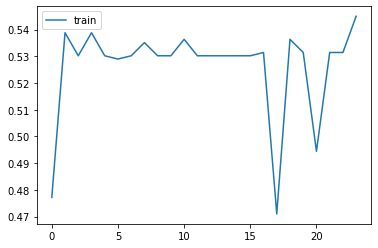

In [18]:
plt.plot(model.history["val_accuracy"])
plt.legend(["train", "test"])
plt.show()

In [19]:
max(model.history["val_accuracy"])

0.54500616

In [20]:
from sklearn.metrics import classification_report
print(classification_report(results.Actual, results.Predicted))

              precision    recall  f1-score   support

           0       0.61      0.09      0.15       381
           1       0.54      0.95      0.69       430

    accuracy                           0.55       811
   macro avg       0.58      0.52      0.42       811
weighted avg       0.57      0.55      0.44       811



In [21]:
model_json = nn.to_json()
file_path = Path("eng_model_posneg.json")
with open(file_path, "w") as json_file:
    json_file.write(model_json)
    
file_path = "eng_weights_posneg.h5"
nn.save_weights(file_path)